In [16]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from shapely.geometry import Point
import numpy as np
import mapclassify
from matplotlib.colors import BoundaryNorm
from matplotlib.colors import ListedColormap
from matplotlib import patheffects
from geopy.distance import distance
from scipy.spatial import cKDTree
from tqdm import tqdm
import os
import seaborn as sns

gdf_brasil = gpd.read_file("./Dados/ShapeFile/br_states.json")

meliponas_gbif = pd.read_csv('./Dados/Ocorrências/Meliponini - GBIF.csv', index_col=0)

In [17]:
def nomePasta(nome, caminho):
    return f'../Imagens/{caminho}/{nome.split(" ")[0]}/' if " " in nome else f'{caminho}/'


def plotarMapaDeCalor(meliponas, nome):
    geometry = [Point(lon, lat) for lon, lat in zip(meliponas['Longitude'], meliponas['Latitude'])]
    gdf_meliponas = gpd.GeoDataFrame(meliponas, geometry=geometry, crs="EPSG:4326")

    gdf_abelhas_estados = gpd.sjoin(gdf_meliponas, gdf_brasil, how="inner")
    ocorrencias_por_estado = gdf_abelhas_estados.groupby('Estado').size().reset_index(name='contagem_ocorrencias')
    gdf_estados = gdf_brasil.merge(ocorrencias_por_estado, left_on='Estado', right_on='Estado', how='left')
    gdf_estados['contagem_ocorrencias'] = gdf_estados['contagem_ocorrencias'].fillna(0)
    cores_abelha = [
         "#7A4C1F",
         "#9C6B28",
         "#AA7A28",
         "#BF8D30",
         "#D17B33",
         "#D68A2E",
         "#E49A00",
         "#F2A700",
         "#F7BD0C",
         "#F6E100",
     ]
    cmap_abelha = ListedColormap(cores_abelha)
    scheme = mapclassify.Quantiles(gdf_estados['contagem_ocorrencias'], k=10)
    bins = scheme.bins.tolist()
    bins = [gdf_estados['contagem_ocorrencias'].min()] + bins 
    norm = BoundaryNorm(bins, cmap_abelha.N)

    fig, ax = plt.subplots(1, 1, figsize=(20,20))
    gdf_brasil.plot(ax=ax, color='gray', edgecolor='gray', alpha=0.1)
    gdf_estados.plot(column='contagem_ocorrencias',
                        cmap=cmap_abelha,
                        norm=norm,
                        ax=ax,
                        legend=True,
                        legend_kwds={'label': "Contagem de Ocorrências de Abelhas",
                                    'orientation': "horizontal"})

    for idx, row in gdf_estados.iterrows():
        if not pd.isna(row['contagem_ocorrencias']):
            centroid = row['geometry'].centroid
            valor = row['contagem_ocorrencias']
            txt = ax.text(centroid.x, centroid.y, int(valor),
                    ha='center', va='center',
                    fontsize=12, color="white", weight='bold')
        
            txt.set_path_effects([patheffects.withStroke(linewidth=1, foreground='black')])
    ax.set_title(f'Ocorrências de {nome} por Totais por Estado', fontsize=14)
    ax.axis('off')
    pasta = nomePasta(nome, 'Mapas de Calor')
    os.makedirs(f"{pasta}", exist_ok=True)
    plt.savefig(f"{pasta}ocorrencias_{nome}.png", format='png', dpi=300, bbox_inches='tight')
    plt.close()

In [10]:
especies = [
    "Friesella schrottkyi",
    "Frieseomelitta varia",
    "Melipona bicolor",
    "Melipona fasciculata",
    "Melipona flavolineata",
    "Melipona marginata",
    "Melipona mondury",
    "Melipona quadrifasciata",
    "Melipona scutellaris",
    "Melipona seminigra",
    "Nannotrigona testaceicornis",
    "Plebeia droryana",
    "Scaptotrigona bipunctata",
    "Scaptotrigona depilis",
    "Tetragonisca angustula",
    "Cephalotrigona capitata",
    "Frieseomelitta flavicornis",
    "Frieseomelitta longipes",
    "Leurotrigona muelleri",
    "Melipona capixaba",
    "Melipona quinquefasciata",
    "Paratrigona lineata",
    "Plebeia minima",
    "Plebeia remota",
    "Plebeia saiqui",
    "Scaptotrigona polysticta",
    "Scaptotrigona postica",
    "Scaptotrigona xanthotricha",
    "Tetragonisca weyrauchi",
    "Trigona spinipes",
    "Frieseomelitta doederleini",
    "Frieseomelitta languida",
    "Geotrigona mombuca",
    "Lestrimelitta limao",
    "Melipona melanoventer",
    "Oxytrigona tataira",
    "Partamona helleri",
    "Plebeia julianii",
    "Schwarziana quadripunctata",
    "Tetragona clavipes",
    "Duckeola ghilianii",
    "Melipona asilvai",
    "Melipona crinita",
    "Melipona eburnea",
    "Melipona fuliginosa",
    "Melipona fulva",
    "Melipona interrupta",
    "Melipona lateralis",
    "Melipona mandacaia",
    "Melipona orbignyi",
    "Melipona paraensis",
    "Melipona rufiventris",
    "Melipona subnitida",
    "Melipona torrida",
    "Nannotrigona punctata",
    "Plebeia emerina",
    "Plebeia flavocincta",
    "Plebeia lucii",
    "Scaptotrigona tubiba",
    "Trigona pallens"
]


In [ ]:
meliponas_gbif[meliponas_gbif['Especie'].isin(especies)]

meliponas_gbif[meliponas_gbif['Especie'].isna()]

,Especie,Latitude,Longitude,Pais,Genero
0,Tetragonisca angustula,-11.524631,-54.355206,BR,Tetragonisca
1,Tetragonisca angustula,-11.524631,-54.355206,BR,Tetragonisca
2,Tetragonisca angustula,-11.524631,-54.355206,BR,Tetragonisca
5,Tetragonisca angustula,-11.524631,-54.355206,BR,Tetragonisca
6,Tetragonisca angustula,-11.524631,-54.355206,BR,Tetragonisca
...,...,...,...,...,...
67123,Melipona asilvai,-5.538399,-36.230202,BR,Melipona
67125,Trigona spinipes,-23.195914,-45.015115,BR,Trigona
67126,Trigona spinipes,-23.195914,-45.015115,BR,Trigona
67127,Trigona spinipes,-23.250700,-45.281500,BR,Trigona


In [18]:
plotarMapaDeCalor(meliponas_gbif, 'Abelhas')
for (genero, especie), grupo in tqdm(meliponas_gbif[:10].groupby(['Genero', 'Especie']), desc="Plotando espécies"):
    if not grupo.empty:
        plotarMapaDeCalor(grupo, especie)

Plotando espécies:   0%|          | 0/1 [00:00<?, ?it/s]d:\UTFPR\Mestrado\Projeto\recomenda_abelha\venv\Lib\site-packages\mapclassify\classifiers.py:1767: UserWarning: Not enough unique values in array to form 10 classes. Setting k to 2.
  self.bins = quantile(y, k=k)
Plotando espécies: 100%|██████████| 1/1 [00:01<00:00,  1.51s/it]


In [19]:
geometry = [Point(lon, lat) for lon, lat in zip(meliponas_gbif['Longitude'], meliponas_gbif['Latitude'])]
gdf_meliponas = gpd.GeoDataFrame(meliponas_gbif, geometry=geometry, crs="EPSG:4326")
ocorrencias_por_estado = gpd.sjoin(gdf_meliponas, gdf_brasil, how="inner").groupby('Estado').size().reset_index(name='contagem_ocorrencias')
gdf_estados = gdf_brasil.merge(ocorrencias_por_estado, left_on='Estado', right_on='Estado', how='left')


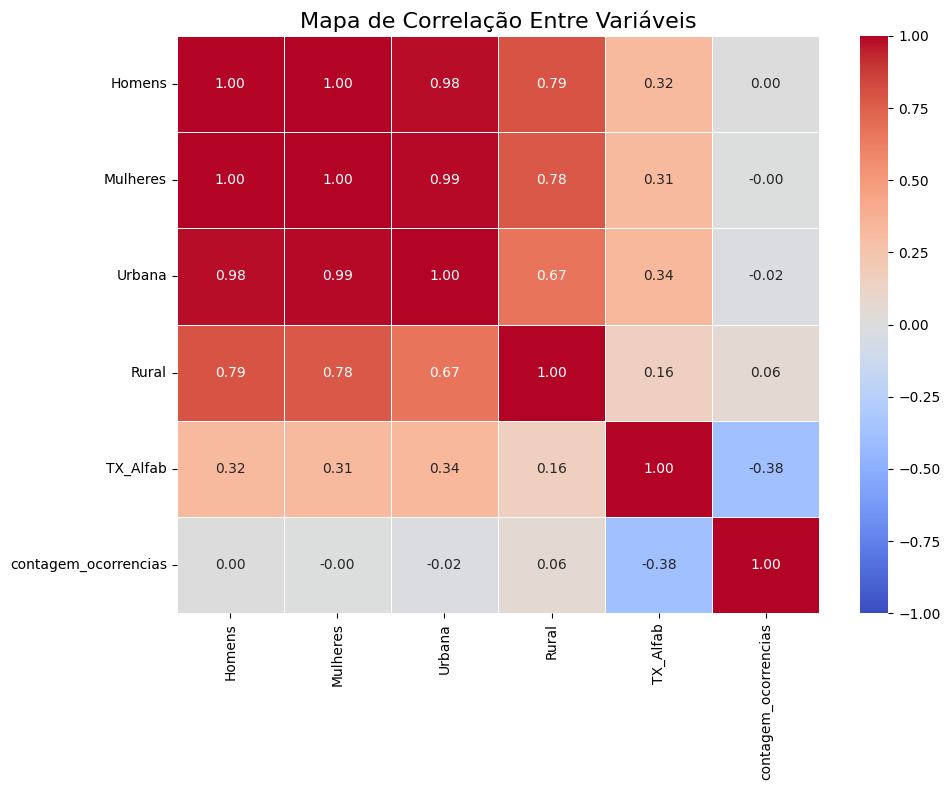

In [ ]:
corr_matrix = gdf_estados[['Homens', 'Mulheres', 'Urbana', 'Rural', 'TX_Alfab', 'contagem_ocorrencias']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1, cbar=True)

plt.title('Mapa de Correlação Entre Variáveis', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
def plotarKDE(df, nome):
    fig, ax = plt.subplots(figsize=(10, 10))

    gdf_brasil.plot(ax=ax, color='white', edgecolor='black')

    sns.kdeplot(
        x=df['Longitude'], 
        y=df['Latitude'], 
        fill=True, 
        cmap='viridis', 
        levels=30, 
        alpha=0.5, 
        ax=ax,
        warn_singular=False
    )

    ax.scatter(df['Longitude'], df['Latitude'], s=5, color='black', alpha=0.3)

    ax.set_title(f'Densidade de Ocorrências de {nome} com Mapa do Brasil')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    pasta = nomePasta(nome, 'KDE')
    os.makedirs(f"{pasta}", exist_ok=True)
    plt.savefig(f"{pasta}ocorrencias_{nome}.png", format='png', dpi=300, bbox_inches='tight')
    plt.close()

In [ ]:
for (genero, especie), grupo in tqdm(meliponas_gbif[:5000].groupby(['Genero', 'Especie']), desc="Plotando espécies"):
    if not grupo.empty:
        plotarKDE(grupo, especie)

Plotando espécies: 100%|██████████| 51/51 [00:41<00:00,  1.23it/s]


In [ ]:
freq_especies = meliponas_gbif['Especie'].value_counts().head(10)

os.makedirs(f"../Imagens/Frequencias", exist_ok=True)

plt.figure(figsize=(10, 5))
sns.barplot(x=freq_especies.values, y=freq_especies.index, palette='magma')
plt.title('Top 10 Espécies Mais Registradas')
plt.xlabel('Frequência')
plt.savefig(f"../Imagens/Frequencias/Especies.png", format='png', dpi=300, bbox_inches='tight')
plt.close()

freq_genero = meliponas_gbif['Genero'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=freq_genero.values, y=freq_genero.index, palette='Blues_r')
plt.title('Frequência de Gêneros')
plt.xlabel('Frequência')
plt.savefig(f"../Imagens/Frequencias/Genero.png", format='png', dpi=300, bbox_inches='tight')
plt.close()

C:\Users\aneca\AppData\Local\Temp\ipykernel_17340\3334148693.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_especies.values, y=freq_especies.index, palette='magma')
C:\Users\aneca\AppData\Local\Temp\ipykernel_17340\3334148693.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_genero.values, y=freq_genero.index, palette='Blues_r')


In [ ]:
coordenadasBrasil = pd.read_csv("../../Dados/coordenadas_com_indices.csv", index_col=0)

coordenadasBrasil

,Latitude,Longitude,Sentinel-NDVI,Sentinel-NDWI
0,-33.80,-74.00,NaN,NaN
1,-33.80,-73.99,NaN,NaN
2,-33.80,-73.98,NaN,NaN
3,-33.80,-73.97,NaN,NaN
4,-33.80,-73.96,NaN,NaN
...,...,...,...,...
15287995,5.19,-34.85,NaN,NaN
15287996,5.19,-34.84,NaN,NaN
15287997,5.19,-34.83,NaN,NaN
15287998,5.19,-34.82,NaN,NaN


In [ ]:
coord_coords = np.array(list(zip(coordenadasBrasil['Longitude'], coordenadasBrasil['Latitude'])))
abelha_coords = np.array(list(zip(meliponas_gbif['Longitude'], meliponas_gbif['Latitude'])))

tree_abelhas = cKDTree(coord_coords)
distancias, indices = tree_abelhas.query(abelha_coords)

meliponas_gbif['NDVI'] = coordenadasBrasil.loc[indices, 'Sentinel-NDVI'].values
meliponas_gbif['NDWI'] = coordenadasBrasil.loc[indices, 'Sentinel-NDWI'].values

In [ ]:
meliponas_gbif.to_csv('../../Dados/Ocorrências/Ocorrencias_com_indices.csv')

In [ ]:
meliponas_inaturalist = pd.read_csv("../../Dados/Ocorrências/Meliponini - INaturalist.csv")
meliponas_inaturalist = meliponas_inaturalist[['latitude', 'longitude', 'species_guess', 'common_name']].rename(columns={'latitude': 'Latitude',
                                                                                                                        'longitude': 'Longitude',
                                                                                                                        'species_guess': 'Especie',
                                                                                                                        'common_name': 'Nome Popular'})
meliponas_inaturalist.Especie

C:\Users\aneca\AppData\Local\Temp\ipykernel_17340\2240850163.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  meliponas_inaturalist = pd.read_csv("../../Dados/Ocorrências/Meliponini - INaturalist.csv")


0                Oxytrigona
1            Stingless Bees
2                Oxytrigona
3        Abejas sin aguijón
4        Abeja culo de vaca
                ...        
58578    Abelhas sem Ferrão
58579               Trigona
58580               Trigona
58581                   NaN
58582         Abelha-Irapuã
Name: Especie, Length: 58583, dtype: object

In [ ]:
plotarMapaDeCalor(meliponas_gbif, 'Abelhas')
for (genero, especie), grupo in tqdm(meliponas_gbif.groupby(['Genero', 'Especie']), desc="Plotando espécies"):
    if not grupo.empty:
        plotarMapaDeCalor(grupo, especie, 'GBIF')

Plotando espécies:   0%|          | 0/115 [00:00<?, ?it/s]


TypeError: plotarMapaDeCalor() takes 2 positional arguments but 3 were given